# Paper: Modelling the COVID-19 epidemic and implementation of population-wide interventions in Italy

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters:

# 46 days: 
# if t < 4 
alpha = 0.570
beta = 0.011
gamma = 0.456
delta = 0.011
epsilon = 0.171
zeta = 0.125
lambdda = 0.034
eta = 0.125
rho = 0.034
mu = 0.017
kappa = 0.017
theta = 0.371
nu = 0.027
xi = 0.017
sigma = 0.017
tao = 0.01

# if  4 <= t < 12
alpha = 0.422
beta = 0.0057
gamma = 0.285
delta = 0.0057
epsilon = 0.171
zeta = 0.125
lambdda = 0.034
eta = 0.125
rho = 0.034
mu = 0.017
kappa = 0.017
theta = 0.371
nu = 0.027
xi = 0.017
sigma = 0.017
tao = 0.01

# if  12 <= t < 22
alpha = 0.422
beta = 0.0057
gamma = 0.285
delta = 0.0057
epsilon = 0.143
zeta = 0.125
lambdda = 0.034
eta = 0.125
rho = 0.034
mu = 0.017
kappa = 0.017
theta = 0.371
nu = 0.027
xi = 0.017
sigma = 0.017
tao = 0.01

# if  22 <= t < 28
alpha = 0.360
beta = 0.005
gamma = 0.2
delta = 0.005
epsilon = 0.143
zeta = 0.034
lambdda = 0.08
eta = 0.034
rho = 0.017
mu = 0.008
kappa = 0.017
theta = 0.371
nu = 0.015
xi = 0.017
sigma = 0.017
tao = 0.01

# if  28 <= t < 38
alpha = 0.210
beta = 0.005
gamma = 0.110
delta = 0.005
epsilon = 0.143
zeta = 0.034
lambdda = 0.08
eta = 0.034
rho = 0.017
mu = 0.008
kappa = 0.017
theta = 0.371
nu = 0.015
xi = 0.017
sigma = 0.017
tao = 0.01


# if  38 <= t
alpha = 0.210
beta = 0.005
gamma = 0.110
delta = 0.005
epsilon = 0.200
zeta = 0.025
lambdda = 0.08
eta = 0.025
rho = 0.020
mu = 0.008
kappa = 0.020
theta = 0.371
nu = 0.015
xi = 0.020
sigma = 0.010
tao = 0.01


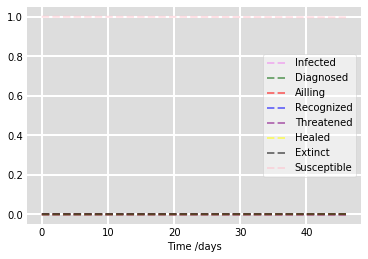

In [7]:
#initial conditions
I0 = 200/60e6
D0 = 20/60e6
A0 = 1/60e6
R0 = 2/60e6
T0 = 0
H0 = 0
E0 = 0
S0 = 1 - I0 - D0 - A0 - R0 - T0 - H0 - E0

# A grid of time points (in days)
t = np.linspace(0, 46, 230) 

# The SIR model differential equations.
def deriv(y, t):
    if t < 4:
        alpha = 0.570
        beta = 0.011
        gamma = 0.456
        delta = 0.011
        epsilon = 0.171
        zeta = 0.125
        lambdda = 0.034
        eta = 0.125
        rho = 0.034
        mu = 0.017
        kappa = 0.017
        theta = 0.371
        nu = 0.027
        xi = 0.017
        sigma = 0.017
        tao = 0.01

    if  4 <= t < 12:
        alpha = 0.422
        beta = 0.0057
        gamma = 0.285
        delta = 0.0057
        epsilon = 0.171
        zeta = 0.125
        lambdda = 0.034
        eta = 0.125
        rho = 0.034
        mu = 0.017
        kappa = 0.017
        theta = 0.371
        nu = 0.027
        xi = 0.017
        sigma = 0.017
        tao = 0.01

    if  12 <= t < 22:
        alpha = 0.422
        beta = 0.0057
        gamma = 0.285
        delta = 0.0057
        epsilon = 0.143
        zeta = 0.125
        lambdda = 0.034
        eta = 0.125
        rho = 0.034
        mu = 0.017
        kappa = 0.017
        theta = 0.371
        nu = 0.027
        xi = 0.017
        sigma = 0.017
        tao = 0.01

    if  22 <= t < 28:
        alpha = 0.360
        beta = 0.005
        gamma = 0.2
        delta = 0.005
        epsilon = 0.143
        zeta = 0.034
        lambdda = 0.08
        eta = 0.034
        rho = 0.017
        mu = 0.008
        kappa = 0.017
        theta = 0.371
        nu = 0.015
        xi = 0.017
        sigma = 0.017
        tao = 0.01

    if  28 <= t < 38:
        alpha = 0.210
        beta = 0.005
        gamma = 0.110
        delta = 0.005
        epsilon = 0.143
        zeta = 0.034
        lambdda = 0.08
        eta = 0.034
        rho = 0.017
        mu = 0.008
        kappa = 0.017
        theta = 0.371
        nu = 0.015
        xi = 0.017
        sigma = 0.017
        tao = 0.01


    if  38 <= t:
        alpha = 0.210
        beta = 0.005
        gamma = 0.110
        delta = 0.005
        epsilon = 0.200
        zeta = 0.025
        lambdda = 0.08
        eta = 0.025
        rho = 0.020
        mu = 0.008
        kappa = 0.020
        theta = 0.371
        nu = 0.015
        xi = 0.020
        sigma = 0.010
        tao = 0.01

    I, D, A, R, T, H, E, S = y
    dSdt = -S * (alpha * I + beta * D + gamma * A + delta * R)
    dIdt = S * (alpha * I + beta * D + gamma * A + delta * R) - (epsilon + zeta + lambdda) * I
    dDdt = epsilon * I - (eta + rho) * D
    dAdt = zeta * I - (theta + mu + kappa) * A 
    dRdt = eta * D + theta * A - (nu + xi) * R
    dTdt = mu * A + nu * R - (sigma + tao) * T
    dHdt = lambdda * I + rho * D + kappa * A + xi * R + sigma * T
    dEdt = tao * T

    return dIdt, dDdt, dAdt, dRdt, dTdt, dHdt, dEdt, dSdt

# Initial conditions vector
y0 = I0, D0, A0, R0, T0, H0, E0, S0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t)
I, D, A, R, T, H, E, S = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, I, 'violet', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D, 'darkgreen', alpha=0.5, lw=2, label='Diagnosed', linestyle='dashed')
ax.plot(t, A, 'red', alpha=0.5, lw=2, label='Ailling', linestyle='dashed')
ax.plot(t, R, 'blue', alpha=0.5, lw=2, label='Recognized', linestyle='dashed')
ax.plot(t, T, 'purple', alpha=0.5, lw=2, label='Threatened', linestyle='dashed')
ax.plot(t, H, 'yellow', alpha=0.5, lw=2, label='Healed', linestyle='dashed')
ax.plot(t, E, 'black', alpha=0.5, lw=2, label='Extinct', linestyle='dashed')
ax.plot(t, S, 'pink', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()